In [4]:
#Load Packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import linalg
from sklearn import neighbors 
from sklearn import metrics
from sklearn import svm
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

#Set plots to inline
%matplotlib inline

#Define plot colors and options
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
labels=['sr','og','^b']
colors=['r','g','b']

#Define classifier decision boundary plotting function
def plot_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [0,1,2]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i]);
    plt.xlabel('Feature 1');
    plt.ylabel('Feature 2');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.colorbar();
    plt.axis('tight');
    plt.title(title);


In [5]:
#Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X    = iris['data']
Y    = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

Training Error Rate is: 0.2667


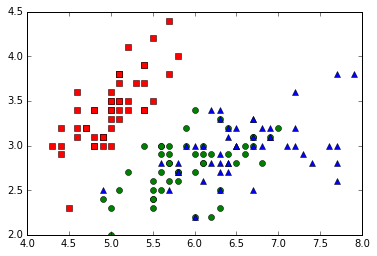

In [6]:
#Select K
K=100

#Select distance metric
metric='euclidean'

#Select first two features
X2 = X[:,[0,1]]

#Fit the classifier
clf = neighbors.KNeighborsClassifier(K,metric=metric)
clf.fit(X2, Y)

#Plot the classification function
plot_classifier(X2,Y,clf,"KNN with K=%d"%(K,))

#Make predictions using model
Yhat = clf.predict(X2)

#Report the error rate
Err  = 1-metrics.accuracy_score(Yhat,Y)
print("Training Error Rate is: %.4f"%(Err,))


SVM on Iris Data
---

Training Error Rate is: 0.2133


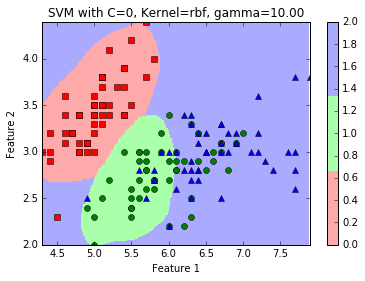

In [14]:
#Select first two features
X2 = X[:,[0,1]]

#Select Regularization Setting
C=0.1


#Select Kernel
kernel='rbf'

#Select the value of gamma
g = 10

#Fit the classifier
clf = svm.SVC(C=C,kernel=kernel,gamma=g)
clf.fit(X2, Y)

#Plot the classification function
plt.figure()
plot_classifier(X2,Y,clf,"SVM with C=%d, Kernel=%s, gamma=%.2f"%(C,kernel,g))

#Make predictions using model
Yhat = clf.predict(X2)

#Report the error rate
Err  = 1-metrics.accuracy_score(Yhat,Y)
print("Training Error Rate is: %.4f"%(Err,))


Crossvalidation on the Iris Data
---

Optimal Parameters: {'kernel': 'rbf', 'C': 0.1, 'gamma': 1}
Test Error Rate is: 0.1579


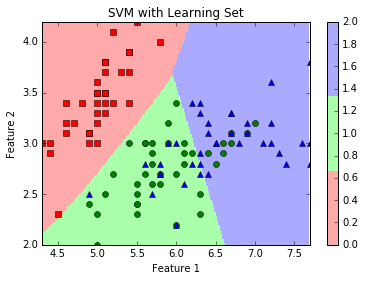

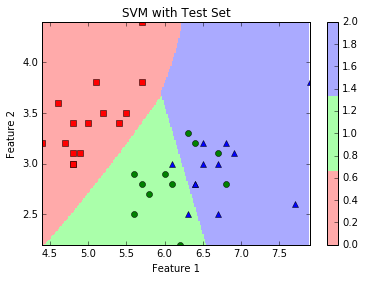

In [5]:
#Define the parameter grid
param_grid = [{'C': [0.01,0.1,1, 10, 100], 'kernel': ['rbf'],'gamma': [0.1,1,10,100]}]

#Select just the first two features
X2 = X[:,[0,1]]

#Creat a learning set/test set split
X2learn,X2test,Ylearn,Ytest = cross_validation.train_test_split(X2, Y, test_size=0.25, random_state=42)

#Do search for optimal parameters using 
#5-fold cross validation on the learning set
clf = GridSearchCV(svm.SVC(C=1), param_grid, cv=5)
clf.fit(X2learn, Ylearn)

#Print optimal parameter set
print "Optimal Parameters:", clf.best_params_

#Plot the classification function with learning set
plt.figure(1)
plot_classifier(X2learn,Ylearn,clf,"SVM with Learning Set")

#Plot the classification function with test set
plt.figure(2)
plot_classifier(X2test,Ytest,clf,"SVM with Test Set")

#Make predictions on the test set using optimal model
Yhat = clf.predict(X2test)

#Report the error rate
Err  = 1-metrics.accuracy_score(Yhat,Ytest)
print("Test Error Rate is: %.4f"%(Err,))